In [212]:
#Genre Trends and Film Durations
#What are the most popular genres over the decades?
#How does genre popularity relate to average runtime?

#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
import ast
import numpy as np

In [188]:
# Read the CSV file
merged_df = pd.read_csv("merged_df2.csv")
#Display Columns
merged_df.columns

Index(['imdb_id', 'id', 'release_date', 'runtime', 'title', 'cast', 'crew',
       'Year', 'Rated', 'Genre', 'Language', 'Country', 'Awards', 'imdbRating',
       'imdbVotes', 'BoxOffice', 'Total Awards', 'Decade', 'Season_of_Year',
       'BoxOffice_millions'],
      dtype='object')

In [189]:
merged_df.head()

,imdb_id,id,release_date,runtime,title,cast,crew,Year,Rated,Genre,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Total Awards,Decade,Season_of_Year,BoxOffice_millions
0,tt0114709,862,1995-10-30,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,G,"Animation, Adventure, Comedy",English,United States,Nominated for 3 Oscars. 29 wins & 24 nominatio...,8.3,1084764.0,223225679.0,56,1990,Fall,223.225679
1,tt0113497,8844,1995-12-15,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995.0,PG,"Adventure, Comedy, Family","English, French",United States,4 wins & 11 nominations,7.1,382657.0,100499940.0,15,1990,Winter,100.499940
2,tt0113228,15602,1995-12-22,101.0,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995.0,PG-13,"Comedy, Romance","English, Italian, German",United States,2 wins & 2 nominations,6.7,30011.0,71518503.0,4,1990,Winter,71.518503
3,tt0114885,31357,1995-12-22,127.0,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995.0,R,"Comedy, Drama, Romance",English,United States,9 wins & 10 nominations,6.0,12462.0,67052156.0,19,1990,Winter,67.052156
4,tt0113041,11862,1995-02-10,106.0,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995.0,PG,"Comedy, Family, Romance",English,United States,1 win & 2 nominations,6.1,42152.0,76594107.0,3,1990,Winter,76.594107


In [192]:
print(merged_df['Genre'].head())

0    Animation, Adventure, Comedy
1       Adventure, Comedy, Family
2                 Comedy, Romance
3          Comedy, Drama, Romance
4         Comedy, Family, Romance
Name: Genre, dtype: object


In [193]:
merged_df['Genre'] = merged_df['Genre'].str.split(', ')

In [194]:
merged_df.explode('Genre')

,imdb_id,id,release_date,runtime,title,cast,crew,Year,Rated,Genre,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Total Awards,Decade,Season_of_Year,BoxOffice_millions
0,tt0114709,862,1995-10-30,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,G,Animation,English,United States,Nominated for 3 Oscars. 29 wins & 24 nominatio...,8.3,1084764.0,223225679.0,56,1990,Fall,223.225679
0,tt0114709,862,1995-10-30,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,G,Adventure,English,United States,Nominated for 3 Oscars. 29 wins & 24 nominatio...,8.3,1084764.0,223225679.0,56,1990,Fall,223.225679
0,tt0114709,862,1995-10-30,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,G,Comedy,English,United States,Nominated for 3 Oscars. 29 wins & 24 nominatio...,8.3,1084764.0,223225679.0,56,1990,Fall,223.225679
1,tt0113497,8844,1995-12-15,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995.0,PG,Adventure,"English, French",United States,4 wins & 11 nominations,7.1,382657.0,100499940.0,15,1990,Winter,100.499940
1,tt0113497,8844,1995-12-15,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995.0,PG,Comedy,"English, French",United States,4 wins & 11 nominations,7.1,382657.0,100499940.0,15,1990,Winter,100.499940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,tt3564472,417870,2017-07-21,122.0,Girls Trip,"[{'cast_id': 6, 'character': 'Ryan Pierce', 'c...","[{'credit_id': '597a1749c3a3686868015efc', 'de...",2017.0,R,Drama,English,"United States, Canada, China",13 wins & 42 nominations,6.2,41022.0,115171585.0,55,2010,Summer,115.171585
6389,tt5390504,407448,2017-07-28,143.0,Detroit,"[{'cast_id': 1, 'character': 'Melvin Dismukes'...","[{'credit_id': '5790cb97c3a3685b2600abfb', 'de...",2017.0,R,Crime,English,United States,4 wins & 21 nominations,7.3,56404.0,16790139.0,25,2010,Summer,16.790139
6389,tt5390504,407448,2017-07-28,143.0,Detroit,"[{'cast_id': 1, 'character': 'Melvin Dismukes'...","[{'credit_id': '5790cb97c3a3685b2600abfb', 'de...",2017.0,R,Drama,English,United States,4 wins & 21 nominations,7.3,56404.0,16790139.0,25,2010,Summer,16.790139
6389,tt5390504,407448,2017-07-28,143.0,Detroit,"[{'cast_id': 1, 'character': 'Melvin Dismukes'...","[{'credit_id': '5790cb97c3a3685b2600abfb', 'de...",2017.0,R,History,English,United States,4 wins & 21 nominations,7.3,56404.0,16790139.0,25,2010,Summer,16.790139


In [207]:
new_df = df_exploded.groupby(['Decade', 'Genre']).size().reset_index(name='Count')
df_exploded.groupby(['Decade', 'Genre']).size().reset_index(name='Count')

,Decade,Genre,Count
0,1980,Action,278
1,1980,Adventure,211
2,1980,Animation,25
3,1980,Biography,57
4,1980,Comedy,602
...,...,...,...
84,2010,Short,4
85,2010,Sport,29
86,2010,Thriller,205
87,2010,War,13


In [266]:
# Get the top 3 genres per decade
top_genres = new_df.groupby('Decade').apply(lambda x: x.nlargest(3, 'Count')[['Decade', 'Genre', 'Count']]).reset_index(drop=True)

# Pivot the data to have genres as columns
pivoted_data = top_genres.pivot(index='Decade', columns='Genre', values='Count').fillna(0)

/var/folders/b0/x5mq08b958s3c6m9n50_43zr0000gn/T/ipykernel_54202/2053101361.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres = new_df.groupby('Decade').apply(lambda x: x.nlargest(3, 'Count')[['Decade', 'Genre', 'Count']]).reset_index(drop=True)


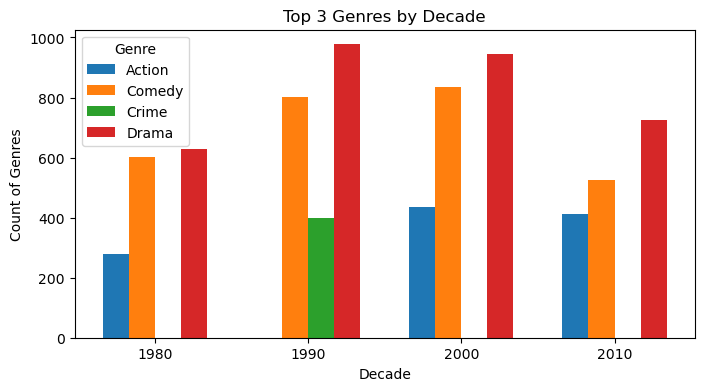

In [267]:
# Plotting
plt.figure(figsize=(8, 4))
bar_width = 0.17  # Width of each bar
decades = pivoted_data.index
genres = pivoted_data.columns
x = np.arange(len(decades))  # The label locations

# Create bars for each genre
for i, genre in enumerate(genres):
    plt.bar(x + i * bar_width, pivoted_data[genre], width=bar_width, label=genre)

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Count of Genres')
plt.title('Top 3 Genres by Decade')
plt.xticks(x + bar_width * (len(genres) - 1) / 2, decades.astype(str))  # Center x labels
plt.grid(axis='y', linestyle='--', alpha=0.9)  # Add dashed gridlines for better readability
plt.legend(title='Genre')
plt.grid(axis='y')

In [260]:
runtime_df = df_exploded.groupby('Genre')['runtime'].mean().reset_index()
df_exploded.groupby('Genre')['runtime'].mean().reset_index()

runtime_df = runtime_df.sort_values(by='runtime', ascending=False)


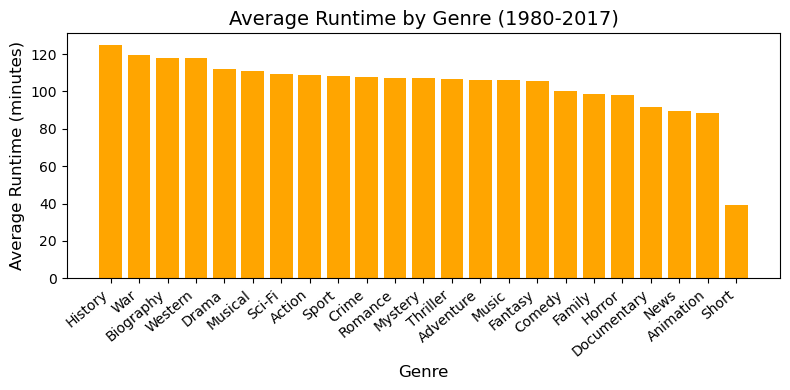

In [276]:

# Create the bar chart
plt.figure(figsize=(8, 4))
plt.bar(runtime_df['Genre'], runtime_df['runtime'], color='orange')


# Adding titles and labels
plt.title('Average Runtime by Genre (1980-2017)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Runtime (minutes)', fontsize=12)
plt.xticks(rotation=40, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to fit labels
